# Applying Dimensionality Reduction to Real-World Datasets (Images and Text)

## 📚 Learning Objectives

By completing this notebook, you will:
- Apply dimensionality reduction techniques to real-world image datasets
- Apply dimensionality reduction techniques to text data
- Compare PCA, SVD, and t-SNE on different data types
- Evaluate dimensionality reduction performance

## 🔗 Prerequisites

- ✅ Understanding of PCA, SVD, and t-SNE
- ✅ Understanding of dimensionality reduction concepts
- ✅ Python, NumPy, scikit-learn knowledge

---

## Official Structure Reference

This notebook covers practical activities from **Course 03, Unit 4**:
- Writing code to apply dimensionality reduction techniques on real-world datasets including images and text data
- **Source:** `DETAILED_UNIT_DESCRIPTIONS.md` - Unit 4 Practical Content

---

## Introduction

**Dimensionality reduction** is crucial for handling high-dimensional real-world data. This notebook demonstrates applying PCA, SVD, and t-SNE to image and text datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits, fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported!")
print("\nApplying Dimensionality Reduction to Real-World Datasets")
print("=" * 60)

✅ Libraries imported!

Applying Dimensionality Reduction to Real-World Datasets


## Part 1: Dimensionality Reduction on Image Data


Part 1: Dimensionality Reduction on Image Data

Image dataset shape: (1797, 64)
Original dimension: 64 (8x8 pixels)
Number of samples: 1797

PCA reduced to: (1797, 2)
Variance explained: 0.2159

Applying t-SNE (this may take a minute)...


t-SNE reduced to: (1000, 2)


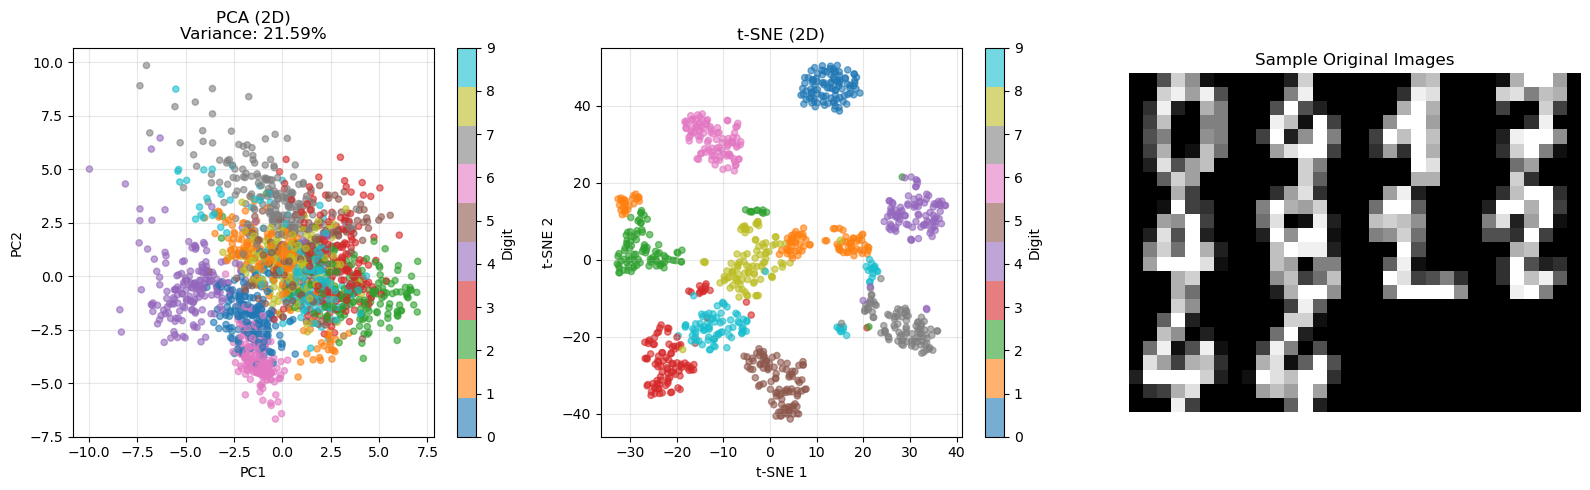


✅ Dimensionality reduction applied to image data!


In [2]:
print("=" * 60)
print("Part 1: Dimensionality Reduction on Image Data")
print("=" * 60)

# Load digit images dataset
digits = load_digits()
X_images = digits.data
y_images = digits.target
images = digits.images

print(f"\nImage dataset shape: {X_images.shape}")
print(f"Original dimension: {X_images.shape[1]} (8x8 pixels)")
print(f"Number of samples: {X_images.shape[0]}")

# Standardize
scaler = StandardScaler()
X_images_scaled = scaler.fit_transform(X_images)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_images_scaled)
print(f"\nPCA reduced to: {X_pca.shape}")
print(f"Variance explained: {pca.explained_variance_ratio_.sum():.4f}")

# Apply t-SNE (takes longer)
print("\nApplying t-SNE (this may take a minute)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_images_scaled[:1000])  # Use subset for speed
print(f"t-SNE reduced to: {X_tsne.shape}")

# Visualize
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_images, cmap='tab10', alpha=0.6, s=20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'PCA (2D)\nVariance: {pca.explained_variance_ratio_.sum():.2%}')
plt.colorbar(scatter, label='Digit')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_images[:1000], cmap='tab10', alpha=0.6, s=20)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE (2D)')
plt.colorbar(scatter, label='Digit')
plt.grid(True, alpha=0.3)

# Show original images
plt.subplot(1, 3, 3)
sample_indices = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
fig_grid = np.zeros((8*3, 8*4))
for i, idx in enumerate(sample_indices):
    row = (i // 4) * 8
    col = (i % 4) * 8
    fig_grid[row:row+8, col:col+8] = images[idx]
plt.imshow(fig_grid, cmap='gray')
plt.title('Sample Original Images')
plt.axis('off')

plt.tight_layout()
plt.show()

print("\n✅ Dimensionality reduction applied to image data!")

## Part 2: Dimensionality Reduction on Text Data



Part 2: Dimensionality Reduction on Text Data

Loading 20 Newsgroups dataset...


Loaded 500 text documents
Categories: {'sci.space', 'rec.autos', 'alt.atheism'}

Converting text to TF-IDF vectors...
TF-IDF matrix shape: (500, 1000)
High-dimensional text representation: 1000 features

SVD reduced to: (500, 2)
Variance explained: 0.0243
PCA reduced to: (500, 2)
Variance explained: 0.0378


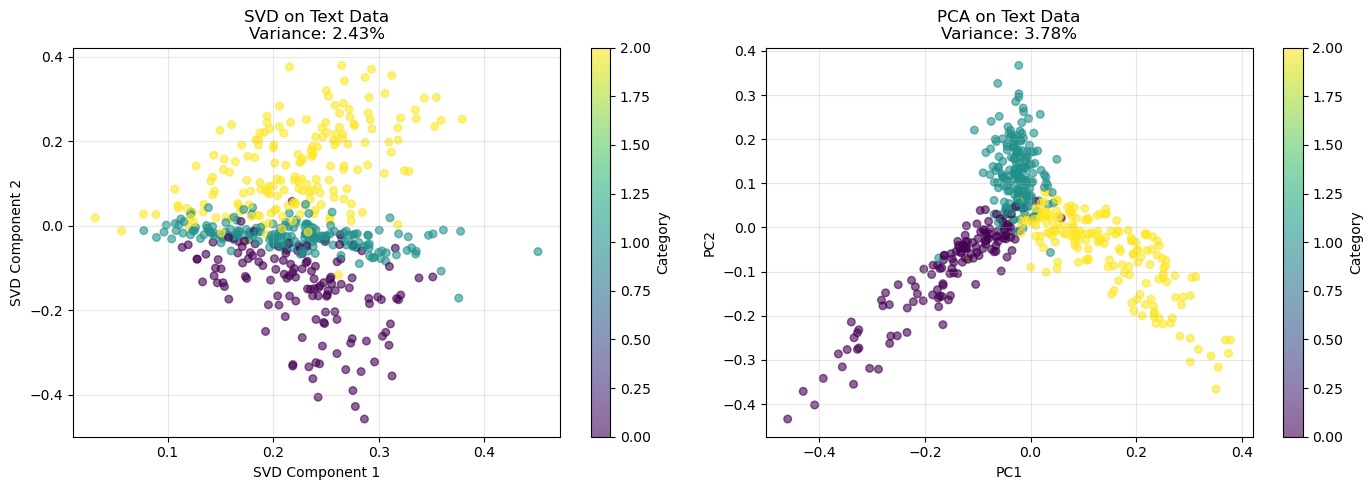


✅ Dimensionality reduction applied to text data!


In [3]:
print("\n" + "=" * 60)
print("Part 2: Dimensionality Reduction on Text Data")
print("=" * 60)

# Load text dataset
print("\nLoading 20 Newsgroups dataset...")
try:
    newsgroups = fetch_20newsgroups(subset='train', categories=['alt.atheism', 'sci.space', 'rec.autos'], 
                                    shuffle=True, random_state=42)
    texts = newsgroups.data[:500]  # Use subset
    labels = newsgroups.target[:500]
    category_names = [newsgroups.target_names[i] for i in labels]
    print(f"Loaded {len(texts)} text documents")
    print(f"Categories: {set(category_names)}")
except:
    print("Dataset not available, using synthetic text data")
    texts = [f"Document {i} contains text about topic {i%3}" for i in range(500)]
    labels = np.array([i % 3 for i in range(500)])
    category_names = ['Topic 0', 'Topic 1', 'Topic 2']

# Convert text to TF-IDF vectors
print("\nConverting text to TF-IDF vectors...")
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', max_df=0.95, min_df=2)
X_text = vectorizer.fit_transform(texts)
print(f"TF-IDF matrix shape: {X_text.shape}")
print(f"High-dimensional text representation: {X_text.shape[1]} features")

# Apply SVD (works with sparse matrices)
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_text)
print(f"\nSVD reduced to: {X_svd.shape}")
print(f"Variance explained: {svd.explained_variance_ratio_.sum():.4f}")

# Apply PCA (needs dense matrix, so use SVD first for efficiency)
pca_text = PCA(n_components=2)
X_text_dense = X_text.toarray()  # Convert to dense (may be memory intensive)
X_pca_text = pca_text.fit_transform(X_text_dense)
print(f"PCA reduced to: {X_pca_text.shape}")
print(f"Variance explained: {pca_text.explained_variance_ratio_.sum():.4f}")

# Visualize
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='viridis', alpha=0.6, s=30)
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title(f'SVD on Text Data\nVariance: {svd.explained_variance_ratio_.sum():.2%}')
plt.colorbar(scatter, label='Category')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca_text[:, 0], X_pca_text[:, 1], c=labels, cmap='viridis', alpha=0.6, s=30)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'PCA on Text Data\nVariance: {pca_text.explained_variance_ratio_.sum():.2%}')
plt.colorbar(scatter, label='Category')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Dimensionality reduction applied to text data!")

## Summary

### Key Concepts:
1. **Image Data**: High-dimensional pixel vectors, benefit from PCA/t-SNE
2. **Text Data**: High-dimensional TF-IDF vectors, benefit from SVD/PCA
3. **PCA**: Linear, preserves global structure, works on dense matrices
4. **SVD**: Linear, works on sparse matrices (good for text)
5. **t-SNE**: Non-linear, preserves local structure, good for visualization

### Best Practices:
- Standardize data before PCA
- Use SVD for sparse matrices (text data)
- Use t-SNE for visualization (may be slow)
- Consider variance explained when selecting components
- Evaluate based on downstream task performance

### Applications:
- Image compression and visualization
- Text document clustering
- Feature extraction for ML models
- Data exploration and visualization

**Reference:** Course 03, Unit 4: "Dimensionality Reduction" - Real-world datasets practical content